## Evaluating SWNet algorithm on apoptotic drugs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import spearmanr

from src.DataLoader import DataLoader
from src.constants import APOPTOSIS_DRUGS

### Support functions

In [6]:
GDSC_rad3 = pd.read_csv("data/SWnet_predictions/GDSC_self-attention_rad3_predictions.tsv", sep="\t")
GDSC_rad2 = pd.read_csv("data/SWnet_predictions/GDSC_self-attention_rad2_predictions.tsv", sep="\t")
GDSC_rad1 = pd.read_csv("data/SWnet_predictions/GDSC_self-attention_rad1_predictions.tsv", sep="\t")

In [7]:
drug_dict = { # id, IC50 threshold
    "Embelin": 86,
    "Obatoclax Mesylate": 153,
}

def process_drug_data(drug_name, GDSC_data):

    drug_1_data = GDSC_data[GDSC_data["drugs"] == drug_dict[drug_name]]
    drug_1_data.sort_values(by=["truth"], inplace=True)

    return drug_1_data

In [8]:
embelin_data_rad3 = process_drug_data("Embelin", GDSC_rad3)
obatoclax_data_rad3 = process_drug_data("Obatoclax Mesylate", GDSC_rad3)

embelin_data_rad2 = process_drug_data("Embelin", GDSC_rad2)
obatoclax_data_rad2 = process_drug_data("Obatoclax Mesylate", GDSC_rad2)

embelin_data_rad1 = process_drug_data("Embelin", GDSC_rad1)
obatoclax_data_rad1 = process_drug_data("Obatoclax Mesylate", GDSC_rad1)

/home/martin/anaconda3/envs/ml-drug/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


/tmp/ipykernel_686634/1585725201.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


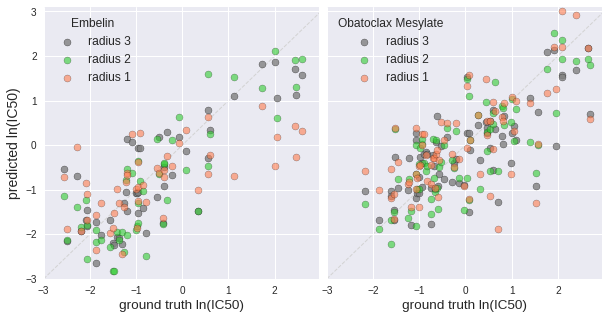

In [33]:
plt.style.use("seaborn")
f, (axL, axR) = plt.subplots(1,2, figsize=(10,5), sharey=True, gridspec_kw={"wspace": 0.03})

axL.scatter(
    embelin_data_rad3["truth"], embelin_data_rad3["predictions"],
    color="gray", edgecolors="black", zorder=5, alpha=0.8,
    label="radius 3"
)

axL.scatter(
    embelin_data_rad2["truth"], embelin_data_rad2["predictions"],
    color="limegreen", edgecolors="black", zorder=5, alpha=0.6,
    label="radius 2"
)

axL.scatter(
    embelin_data_rad1["truth"], embelin_data_rad1["predictions"],
    color="coral", edgecolors="black", zorder=5, alpha=0.6,
    label="radius 1"
)


axL.plot([-3, 3], [-3, 3], "--", lw=1, color="lightgray", zorder=0)
axL.set_xlim(-3,2.95)
axL.set_ylim(-3,3)

axR.scatter(
    obatoclax_data_rad3["truth"], obatoclax_data_rad3["predictions"],
    color="gray", edgecolors="black", zorder=5, alpha=0.8,
    label="radius 3"
)

axR.scatter(
    obatoclax_data_rad2["truth"], obatoclax_data_rad2["predictions"],
    color="limegreen", edgecolors="black", zorder=5, alpha=0.6,
    label="radius 2"
)

axR.scatter(
    obatoclax_data_rad1["truth"], obatoclax_data_rad1["predictions"],
    color="coral", edgecolors="black", zorder=5, alpha=0.6,
    label="radius 1"
)
axR.plot([-3, 3], [-3, 3], "--", lw=1, color="lightgray", zorder=0)
axR.set_xlim(-3,2.95)
axR.set_ylim(-3,3.1)

axL.set_xlabel("ground truth ln(IC50)", fontsize=13.5)
axL.set_ylabel("predicted ln(IC50)", fontsize=14)
axR.set_xlabel("ground truth ln(IC50)", fontsize=13.5)

axL.legend(title="Embelin", title_fontsize=12, fontsize=12)
axR.legend(title="Obatoclax Mesylate", title_fontsize=12, fontsize=12)

f.tight_layout()
f.savefig("figures/SWnet_rad3_apoptosis_comparison.png", dpi=600, bbox_inches="tight")

In [26]:
for embelin in [embelin_data_rad1, embelin_data_rad2, embelin_data_rad3]:

    print(f"\nEmbelin\nMSE: {mean_squared_error(embelin['truth'].values, embelin['predictions'].values):.3f} \
            \nR2:    {r2_score(embelin['truth'].values, embelin['predictions'].values):.3f}\
            \nSpearman R: {spearmanr(embelin['truth'].values, embelin['predictions'].values)[0]:.3f}"
    )


Embelin
MSE: 1.126             
R2:    0.372            
Spearman R: 0.672

Embelin
MSE: 0.660             
R2:    0.632            
Spearman R: 0.770

Embelin
MSE: 0.611             
R2:    0.659            
Spearman R: 0.747


In [34]:
for obatoclax_data in [obatoclax_data_rad1, obatoclax_data_rad2, obatoclax_data_rad3]:

    print(f"\nObatoclax\nMSE: {mean_squared_error(obatoclax_data['truth'].values, obatoclax_data['predictions'].values):.3f} \
            \nR2:    {r2_score(obatoclax_data['truth'].values, obatoclax_data['predictions'].values):.3f}\
            \nSpearman R: {spearmanr(obatoclax_data['truth'].values, obatoclax_data['predictions'].values)[0]:.3f}"
    )


Obatoclax
MSE: 0.821             
R2:    0.386            
Spearman R: 0.628

Obatoclax
MSE: 0.620             
R2:    0.536            
Spearman R: 0.736

Obatoclax
MSE: 0.657             
R2:    0.509            
Spearman R: 0.698
